# Data Analysis using Python
...


Questions the Business Owner would like answered. <br>
Question 1: What was the best time for sales?<br>
Question2: Which city sold the most product?<br>
Question3: What time should we display advertisements to maximize likelihood of customer's buying product?<br>
Question4: What products are most often sold together?<br>
Question5: What product sold the most?<br>

In [2]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Read the new csv file in a new DataFrame 
sales = pd.read_csv("C:/Users/renal/Documents/Renaldo's File/Data Analyst Portofolio -Renaldo Livando/Project1 Data Wrangling using Python/out/cleaned_electronic_sales_data.csv")

# Check and review our dataframe
sales.head()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season
0,176558,2019-04-19 08:46:00,April,USB-C Charging Cable,2.0,11.95,23.90,"917 1st St, Dallas, TX 75001",917 1st St,Dallas,TX,75001,Spring
1,176559,2019-04-07 22:30:00,April,Bose SoundSport Headphones,1.0,99.99,99.99,"682 Chestnut St, Boston, MA 02215",682 Chestnut St,Boston,MA,2215,Spring
2,176560,2019-04-12 14:38:00,April,Google Phone,1.0,600.00,600.00,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring
3,176560,2019-04-12 14:38:00,April,Wired Headphones,1.0,11.99,11.99,"669 Spruce St, Los Angeles, CA 90001",669 Spruce St,Los Angeles,CA,90001,Spring
4,176561,2019-04-30 09:27:00,April,Wired Headphones,1.0,11.99,11.99,"333 8th St, Los Angeles, CA 90001",333 8th St,Los Angeles,CA,90001,Spring


## Question 1: What was the best time for sales?

For the first question, we will analyze at quarter level and month level.

In [4]:
#Change Order Date column into datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
quarter_col = sales['Order Date'].dt.to_period('Q')
quarter_col

#Do aggregation into Order Date column by quarter
quarter_sales = sales.groupby(quarter_col)['Total Cost'].sum().reset_index()
quarter_sales

,Order Date,Total Cost
0,2019Q1,6817794.30
1,2019Q2,9116114.36
2,2019Q3,6982010.38
3,2019Q4,11540948.61
4,2020Q1,8670.29


We found that outlier from our dataset. Lets give it a check

In [33]:
sales_2020 = sales.loc[(sales['Order Date'] >= '2020-01-01')]
sales_2020.shape[0]

34

In [38]:
sales_2020.tail()

,Order ID,Order Date,Month,Product,Quantity Ordered,Price Each,Total Cost,Purchase Address,Street,City,State,Postal Code,Season
50628,315315,2020-01-01 01:22:00,January,27in 4K Gaming Monitor,1.0,389.99,389.99,"552 North St, Austin, TX 73301",552 North St,Austin,TX,73301,Winter
52213,316833,2020-01-01 02:58:00,January,Vareebadd Phone,1.0,400.00,400.00,"378 Elm St, New York City, NY 10001",378 Elm St,New York City,NY,10001,Winter
52248,316867,2020-01-01 01:05:00,January,27in FHD Monitor,1.0,149.99,149.99,"137 Madison St, Seattle, WA 98101",137 Madison St,Seattle,WA,98101,Winter
54780,319308,2020-01-01 03:13:00,January,USB-C Charging Cable,1.0,11.95,11.95,"135 8th St, Boston, MA 02215",135 8th St,Boston,MA,2215,Winter
54842,319366,2020-01-01 00:45:00,January,20in Monitor,2.0,109.99,219.98,"746 South St, San Francisco, CA 94016",746 South St,San Francisco,CA,94016,Winter


We got that the data are just puchasement made in 1 January. Means this data not the entire report for January 2020.
So, the right decision is to filter it by excluded for our further calculation/analysis.<br><br>
Because we do time-series analysis, this filter step is necessary to make sure the consistency of our analysis.


In [11]:
#Filter the unwanted record
sales_2019 = sales.loc[(sales['Order Date'] >= '2019-01-01')
                     & (sales['Order Date'] < '2019-12-31')]

sales_filtered=sales_2019.copy()
sales_filtered['Order Date'] = pd.to_datetime(sales_filtered['Order Date'])
sales_filtered['Quarter'] = sales_filtered['Order Date'].dt.to_period('Q')

#Group by again our new data into quarter
quarter_sales_2019= sales_filtered.groupby('Quarter')['Total Cost'].sum().reset_index()

#Change datatype so we can do calculation and visualization in further analysis
quarter_sales_2019['Total Cost']=quarter_sales_2019['Total Cost'].astype(int)
quarter_sales_2019['Quarter']=quarter_sales_2019['Quarter'].astype(str)

#Substring column 'Quarter' to make it simple
quarter_sales_2019['Quarter']=quarter_sales_2019['Quarter'].str[-2:]
quarter_sales_2019

,Quarter,Total Cost
0,Q1,6817794
1,Q2,9116114
2,Q3,6982010
3,Q4,11409509


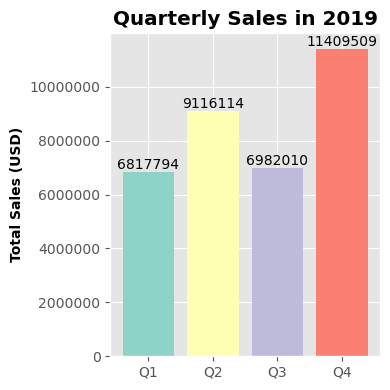

In [44]:
# Set the style of the chart
plt.style.use('ggplot')


# Create a figure size and axes
fig, ax = plt.subplots(figsize = (4,4))

# Set our ticklabel so won't present in scientific format
plt.ticklabel_format(style = 'plain')

# Set the x-axis values and the corresponding heights
x_values = quarter_sales_2019['Quarter']
y_values = quarter_sales_2019['Total Cost']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

# Set labels and title
ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Quarterly Sales in 2019', fontweight = 'bold')

# Display the chart
plt.tight_layout()
plt.show()

Now we analysis in month level

In [46]:
# Group by the month and see the best month for sales 

monthly_sales = sales.groupby('Month')['Total Cost'].sum().reset_index()

# Lets check the monthly sales 
monthly_sales

,Month,Total Cost
0,April,3389217.98
1,August,2241083.37
2,December,4608295.70
3,February,2200078.08
4,January,1821413.16
5,July,2646461.32
6,June,2576280.15
7,March,2804973.35
8,May,3150616.23
9,November,3197875.05


In [47]:
# Define the month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                'November', 'December']

# Sort the DataFrame by the month order
monthly_sales_sorted_by_month = monthly_sales.sort_values(by='Month', key=lambda x: x.map({v: k for k, v in enumerate(month_order)}))

monthly_sales_sorted_by_month = monthly_sales_sorted_by_month.reset_index(drop = True)
monthly_sales_sorted_by_month['Total Cost']=monthly_sales_sorted_by_month['Total Cost'].astype(int)
monthly_sales_sorted_by_month

,Month,Total Cost
0,January,1821413
1,February,2200078
2,March,2804973
3,April,3389217
4,May,3150616
5,June,2576280
6,July,2646461
7,August,2241083
8,September,2094465
9,October,3734777


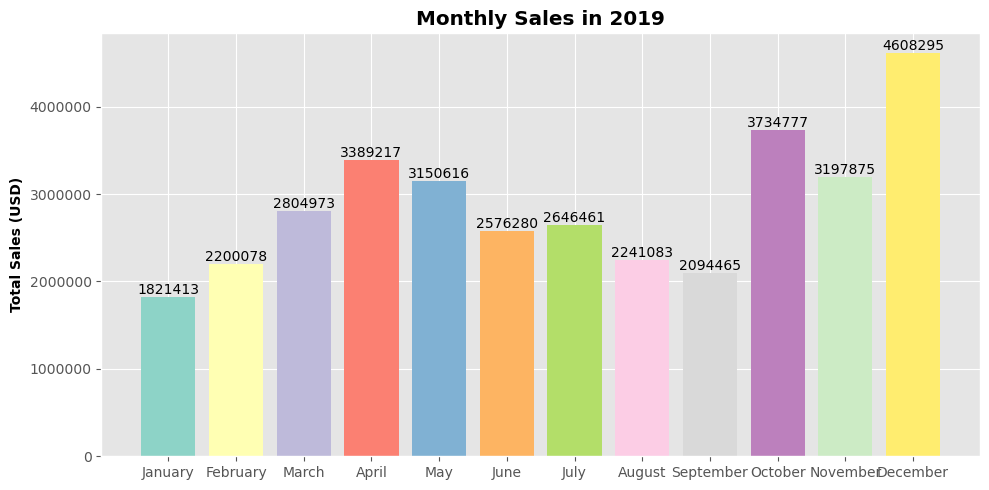

In [59]:
# Set the style of the chart
plt.style.use('ggplot')

# Create a figure size and axes
fig, ax = plt.subplots(figsize = (10,5))

# Set our ticklabel so won't present in scientific format
plt.ticklabel_format(style = 'plain')

# Set the x-axis values and the corresponding heights
x_values = monthly_sales_sorted_by_month['Month']
y_values = monthly_sales_sorted_by_month['Total Cost']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

# Set labels and title
ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Monthly Sales in 2019', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the chart
plt.tight_layout()
plt.show()

With these analysis we can answer the first question.<br>
The best time for sales from consideration by sales data in 2019 is on quarter 4 and on December.

## Question2: Which city sold the most product? 

In [61]:
top_city = sales.groupby('City')['Total Cost'].sum().reset_index()
top_city

,City,Total Cost
0,Atlanta,2794199.07
1,Austin,1818044.33
2,Boston,3658627.65
3,Dallas,2765373.96
4,Los Angeles,5448304.28
5,New York City,4661867.14
6,Portland,2319331.94
7,San Francisco,8254743.55
8,Seattle,2745046.02


In [ ]:
#Change datatype so we can do calculation and visualization in further analysis
top_city['Total Cost']=top_city['Total Cost'].astype(int)


In [ ]:
top_city['City']=top_city['Quarter'].astype(str)

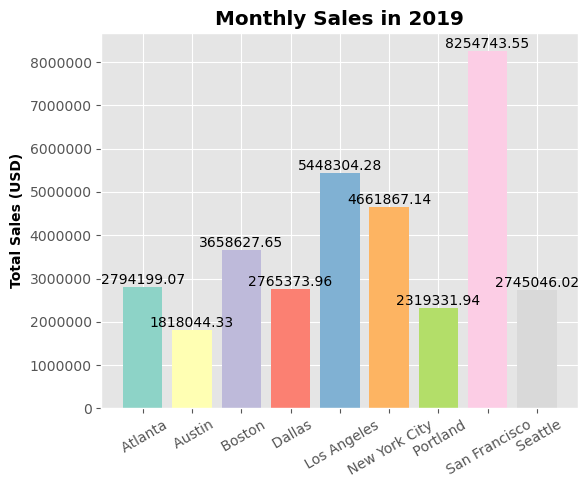

In [66]:
# Set the style of the chart
plt.style.use('ggplot')

# Create a figure size and axes
fig, ax = plt.subplots(figsize = (6,5))

# Set our ticklabel so won't present in scientific format
plt.ticklabel_format(style = 'plain')

# Set the x-axis values and the corresponding heights
x_values = top_city['City']
y_values = top_city['Total Cost']

# Create an array of colors for the bars
colors = plt.cm.Set3(np.arange(len(x_values)))

# Create the bar chart with colored bars
ax.bar(x_values, y_values, color=colors)

# Add labels to the bars
for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

# Set labels and title
ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Monthly Sales in 2019', fontweight = 'bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=30)

# Display the chart
plt.tight_layout()
plt.show()

In [65]:
top_city2 = sales.groupby('City')['Product'].count().reset_index()
top_city2

,City,Product
0,Atlanta,14863
1,Austin,9890
2,Boston,19901
3,Dallas,14797
4,Los Angeles,29564
5,New York City,24847
6,Portland,12449
7,San Francisco,44662
8,Seattle,14713


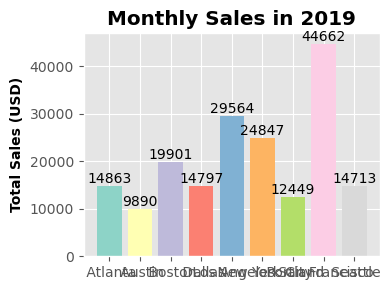

In [72]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (4,3))

plt.ticklabel_format(style = 'plain')

x_values = top_city2['City']
y_values = top_city2['Product']

colors = plt.cm.Set3(np.arange(len(x_values)))

ax.bar(x_values, y_values, color=colors)

for i, v in enumerate(y_values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontweight = 'light')

ax.set_ylabel('Total Sales (USD)', fontweight = 'bold')
ax.set_title('Monthly Sales in 2019', fontweight = 'bold')

plt.tight_layout()
plt.show()